In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer_data = pd.read_csv('data.csv')
cancer_data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [3]:
cancer_data.drop(columns=['Unnamed: 32','id'],inplace=True)

In [4]:
cancer_data.columns.sort_values()

Index(['area_mean', 'area_se', 'area_worst', 'compactness_mean',
       'compactness_se', 'compactness_worst', 'concave points_mean',
       'concave points_se', 'concave points_worst', 'concavity_mean',
       'concavity_se', 'concavity_worst', 'diagnosis',
       'fractal_dimension_mean', 'fractal_dimension_se',
       'fractal_dimension_worst', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'radius_mean', 'radius_se', 'radius_worst',
       'smoothness_mean', 'smoothness_se', 'smoothness_worst', 'symmetry_mean',
       'symmetry_se', 'symmetry_worst', 'texture_mean', 'texture_se',
       'texture_worst'],
      dtype='object')

In [5]:
Y = cancer_data['diagnosis']
X = cancer_data.drop('diagnosis', axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler

standardScaler = MinMaxScaler() 
columns_std = X.columns
X[columns_std] = standardScaler.fit_transform(X[columns_std])
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
..           ...           ...             ...        ...              ...   
564     0.690000      0.428813        0.678668   0.566490         0.526948   
565     0.622320      0.626987        0.604036   0.474019         0.407782   
566     0.455251      0.621238        0.445788   0.303118         0.288165   
567     0.644564      0.663510        0.665538   0.475716         0.588336   
568     0.036869      0.501522        0.028540   0.015907         0.000000   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.792037        0.703140             0.731113       0.686364   
1            0.181768        0.203608             0.348757       0.379798   
2            0.431017        0.462512             0.635686       0.509596   
3            0.811361        0.565604             0.522863       0.776263   
4            0.347893        0.463918             0.518390       0.378283   
..                ...             ...                  ...            ...   
564          0.296055        0.571462             0.690358       0.336364   
565          0.257714        0.337395             0.486630       0.349495   
566          0.254340        0.216753             0.263519       0.267677   
567          0.790197        0.823336             0.755467       0.675253   
568          0.074351        0.000000             0.000000       0.266162   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  0.605518  ...      0.620776       0.141525   
1                  0.141323  ...      0.606901       0.303571   
2                  0.211247  ...      0.556386       0.360075   
3                  1.000000  ...      0.248310       0.385928   
4                  0.186816  ...      0.519744       0.123934   
..                      ...  ...           ...            ...   
564                0.132056  ...      0.623266       0.383262   
565                0.113100  ...      0.560655       0.699094   
566                0.137321  ...      0.393099       0.589019   
567                0.425442  ...      0.633582       0.730277   
568                0.187026  ...      0.054287       0.489072   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           0.668310    0.450698          0.601136           0.619292   
1           0.539818    0.435214          0.347553           0.154563   
2           0.508442    0.374508          0.483590           0.385375   
3           0.241347    0.094008          0.915472           0.814012   
4           0.506948    0.341575          0.437364           0.172415   
..               ...         ...               ...                ...   
564         0.576174    0.452664          0.461137           0.178527   
565         0.520892    0.379915          0.300007           0.159997   
566         0.379949    0.230731          0.282177           0.273705   
567         0.668310    0.402035          0.619626           0.815758   
568         0.043578    0.020497          0.124084           0.036043   

     concavity_worst  concave points_worst  symmetry_worst  \
0           0.568610              0.912027        0.598462   
1           0.192971              0.639175        0.233590   
2           0.359744              0.835052        0.403706   
3           0.548642              0.884880        1.000000   
4           0.319489              0.558419        0.157500   
..               ...                   ...             ...   
564         0.328035              0.761512        0

## EDA (Exploratory Data Analysis)

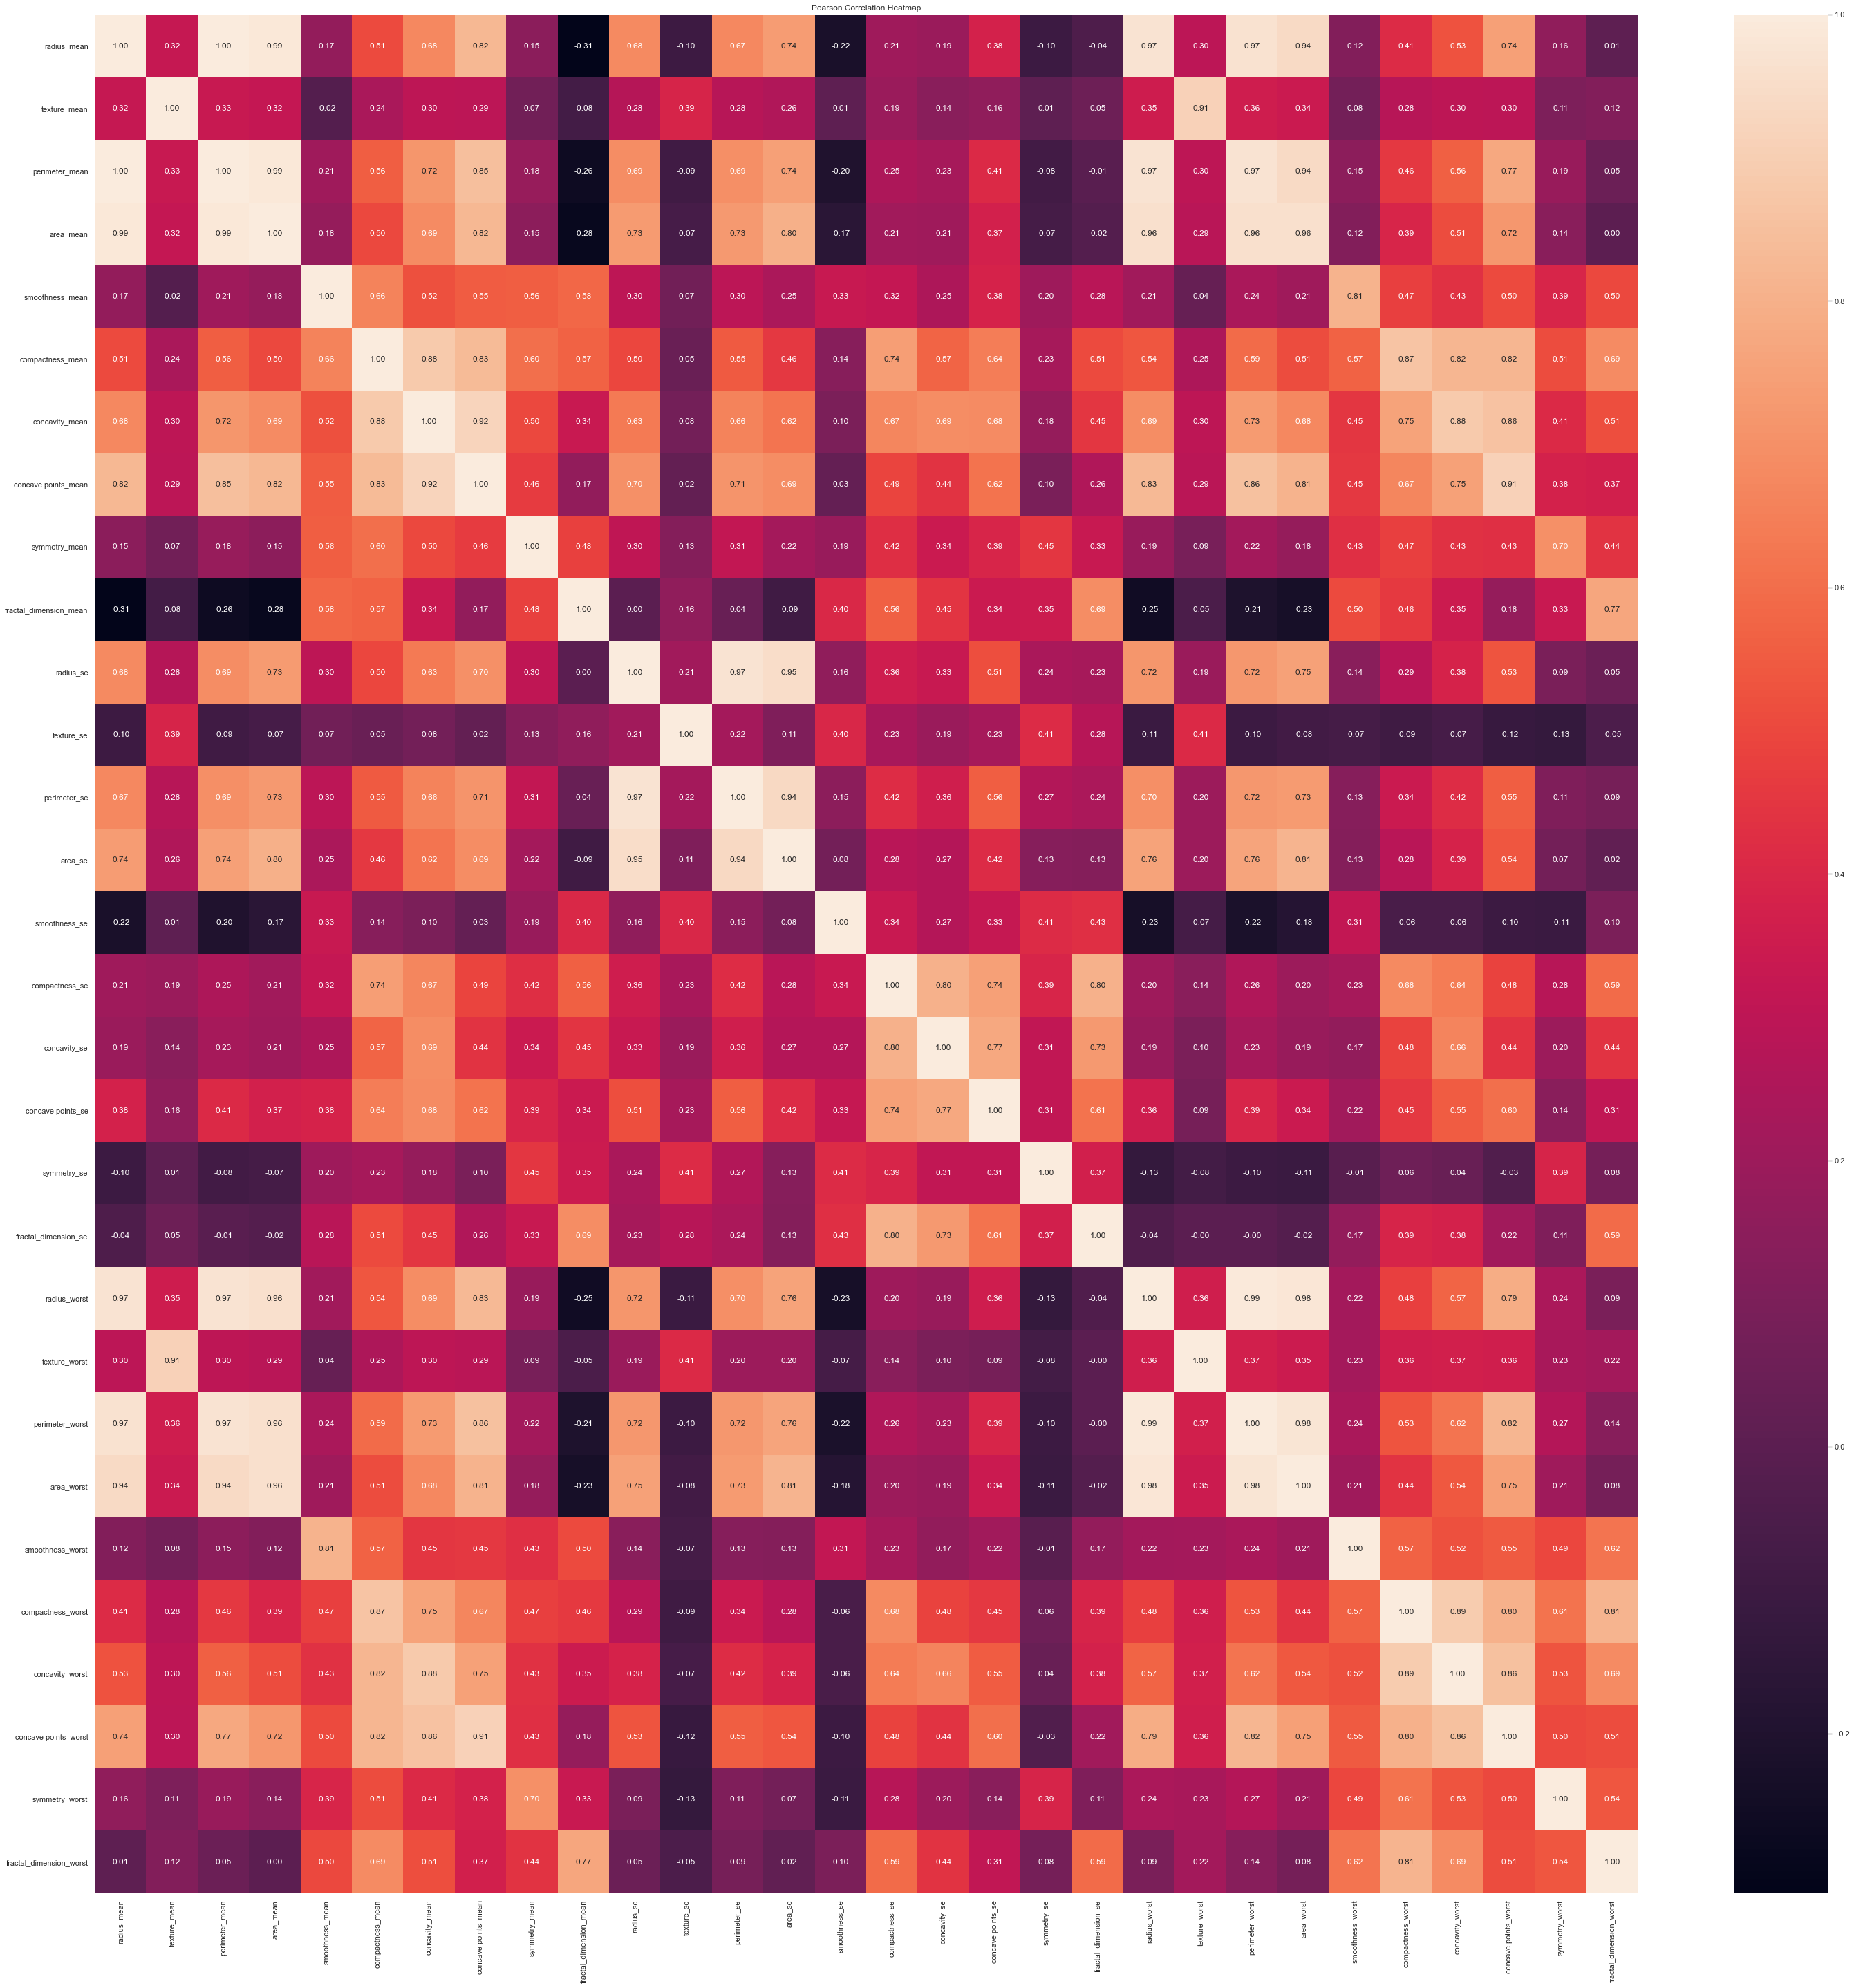

In [8]:
corr = cancer_data.corr(method = 'pearson')
plt.figure(figsize=(50,50))
sns.set(rc={'axes.facecolor':'white'})
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

## Splitting the data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (455, 30) (455,)
Test set: (114, 30) (114,)


###  K Nearest Neighbors

In [10]:
Ks = 10
score_pred = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Entrenando modelo y prediciendo
    KNN = KNeighborsClassifier(n)
    KNN.fit(X_train,Y_train)
    KNN_pred=KNN.predict(X_test)
    KNN_accu=metrics.accuracy_score(Y_test, KNN_pred)
    score_pred[n-1] = KNN_accu
    
score_pred

array([0.95614035, 0.97368421, 0.96491228, 0.97368421, 0.96491228,
       0.96491228, 0.96491228, 0.96491228, 0.96491228])

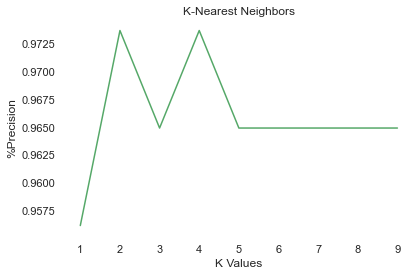

In [11]:
plt.plot(range(1,Ks),score_pred,'g')
plt.title('K-Nearest Neighbors')
plt.ylabel('%Precision')
plt.xlabel('K Values')
plt.tight_layout()
plt.show()

In [13]:
KNN = KNeighborsClassifier(4)
DT = DecisionTreeClassifier(criterion='entropy',max_depth=3)
RF = RandomForestClassifier(max_depth=5, n_estimators=100)
XGB = XGBClassifier(random_state=0)

In [14]:
KNN.fit(X_train,Y_train)
DT.fit(X_train,Y_train)
RF.fit(X_train,Y_train)
XGB.fit(X_train,Y_train)

[17:33:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Scores

In [15]:
# Predicted Data
KNN_pred=KNN.predict(X_test)
DT_pred=DT.predict(X_test)
RF_pred=RF.predict(X_test)
XGB_pred=XGB.predict(X_test)

#Accuracy Score
KNN_accu=metrics.accuracy_score(Y_test, KNN_pred)
DT_accu=metrics.accuracy_score(Y_test, DT_pred)
RF_accu=metrics.accuracy_score(Y_test, RF_pred)
XGB_accu=metrics.accuracy_score(Y_test, XGB_pred)

#F1 Score
KNN_f1score=f1_score(Y_test,KNN_pred,average='weighted',labels=np.unique(KNN_pred))
DT_f1score=f1_score(Y_test,DT_pred,average='weighted',labels=np.unique(DT_pred))
RF_f1score=f1_score(Y_test,RF_pred,average='weighted',labels=np.unique(RF_pred))
XGB_f1score=f1_score(Y_test,XGB_pred,average='weighted',labels=np.unique(XGB_pred))

print(f"KNeighbors Accuracy: \t{KNN_accu}")
print(f"DecisionTree Accuracy: \t{DT_accu}")
print(f"RandomForest Accuracy: \t{RF_accu}")
print(f"XGBoosting Accuracy: \t{XGB_accu}\n")

print(f"KNeighbors F1 Score: \t{KNN_f1score}")
print(f"DecisionTree F1 Score: \t{DT_f1score}")
print(f"RandomForest F1 Score: \t{RF_f1score}")
print(f"XGBoosting F1 Score: \t{XGB_f1score}")

KNeighbors Accuracy: 	0.9736842105263158
DecisionTree Accuracy: 	0.956140350877193
RandomForest Accuracy: 	0.9649122807017544
XGBoosting Accuracy: 	0.956140350877193

KNeighbors F1 Score: 	0.9736214250146138
DecisionTree F1 Score: 	0.9558014271241044
RandomForest F1 Score: 	0.9647382344750767
XGBoosting F1 Score: 	0.9560357083576897


In [16]:
data = {'Models':['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBoostingClassifier'],
        'Accuracy':[KNN_accu,DT_accu,RF_accu,XGB_accu],
        'F1_score':[KNN_f1score, DT_f1score, RF_f1score, XGB_f1score]}
score = pd.DataFrame(data)
score = score.sort_values(by=['F1_score'], ascending=False)
score = score.reset_index(drop=True)
cm = sns.light_palette("green", as_cmap=True)
predic_final = score.style.background_gradient(cmap=cm)
predic_final

# Ploting

## Decision Tree

In [17]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(DT, out_file=None, 
    feature_names=cancer_data.drop('diagnosis', axis=1).columns,    
    class_names=cancer_data['diagnosis'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data,format='png')
pic_path = graph.render(filename='dt_cancer')

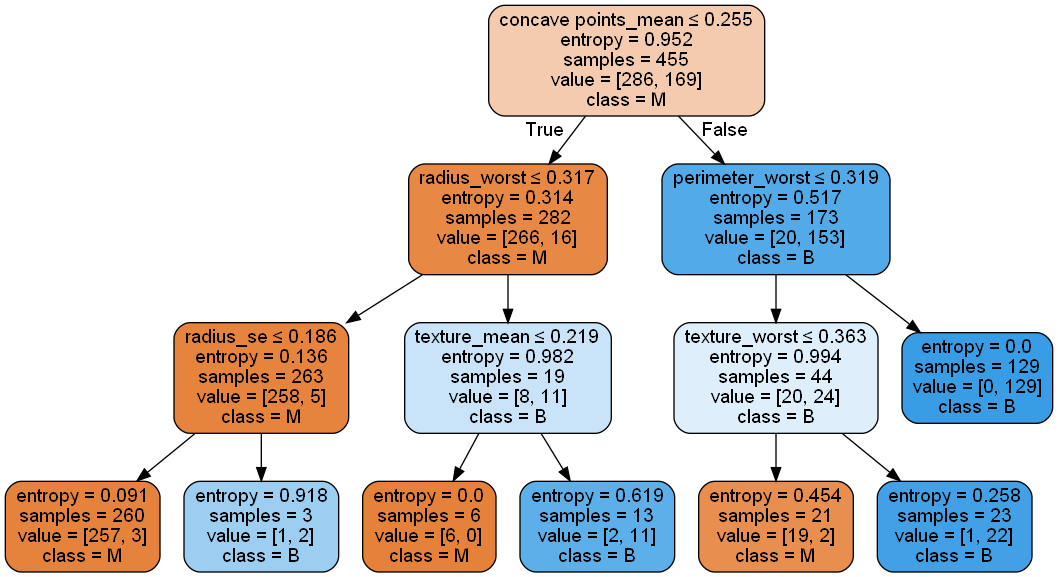

In [18]:
from IPython.display import Image
Image('dt_cancer.png', width=900, height=900)

## XGBoost

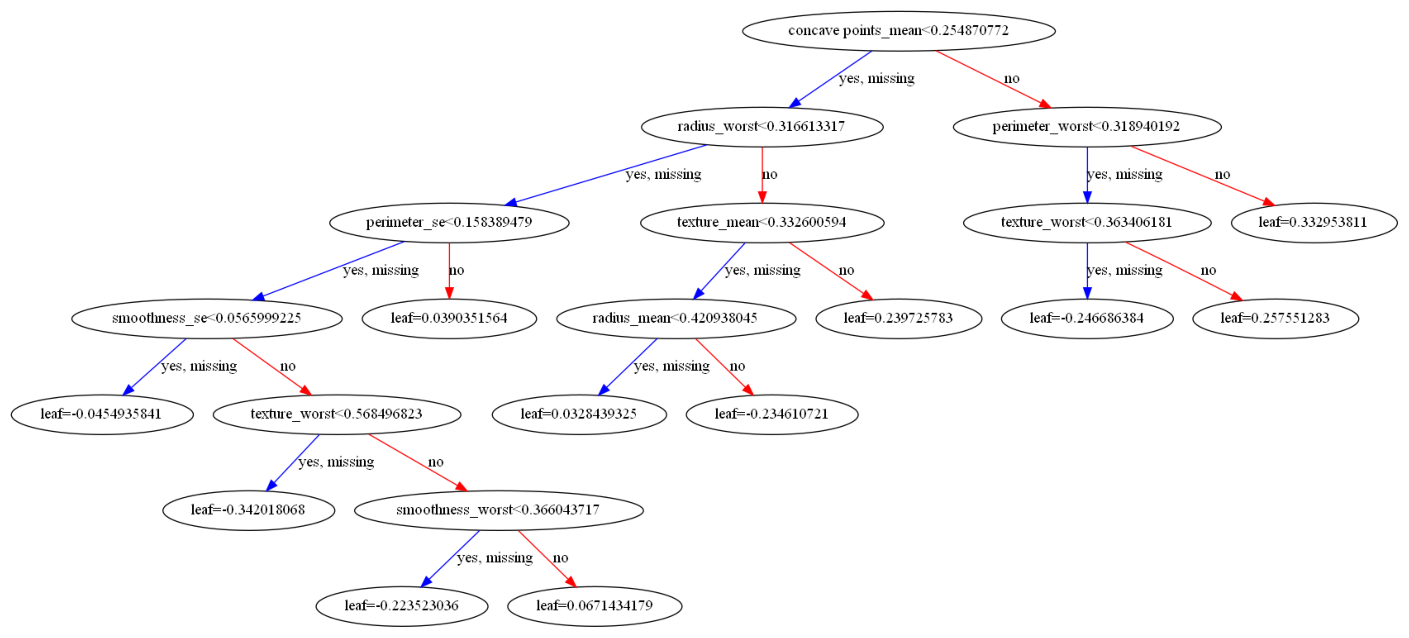

In [19]:
import xgboost as xgb
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(25,25))
xgb.plot_tree(XGB, num_trees=4, ax=ax)
plt.savefig('xgb_tree.png',format='png',bbox_inches = "tight")
plt.show()

## Columns importance by model

### Decision Tree

In [20]:
col_sorted_by_importance=DT.feature_importances_.argsort()
feat_imp_dt=pd.DataFrame({
    'Columns':X.columns[col_sorted_by_importance],
    'Importance (%)':DT.feature_importances_[col_sorted_by_importance]
    })
feat_imp_dt=feat_imp_dt[feat_imp_dt['Importance (%)']!=0].sort_values(by='Importance (%)',ascending=False)

In [21]:
import plotly_express as px
fig =px.bar(feat_imp_dt, x='Columns', y='Importance (%)')
fig.update_xaxes(title="Columns")
fig.update_layout(title_text='Decision Tree Important Columns', title_x=0.5)
fig.show() #in folder Columns importance by model

### Random Forest

In [22]:
col_sorted_by_importance=RF.feature_importances_.argsort()
feat_imp_rf=pd.DataFrame({
    'Columns':X.columns[col_sorted_by_importance],
    'Importance (%)':RF.feature_importances_[col_sorted_by_importance]
    })
feat_imp_rf=feat_imp_rf[feat_imp_rf['Importance (%)']!=0].sort_values(by='Importance (%)',ascending=False)

In [23]:
import plotly_express as px
fig =px.bar(feat_imp_rf, x='Columns', y='Importance (%)')
fig.update_xaxes(title="Columns",tickangle=-45)
fig.update_layout(title_text='Random Forest Important Columns', title_x=0.5)
fig.show() #in folder Columns importance by model

### XGBoost

In [24]:
col_sorted_by_importance=XGB.feature_importances_.argsort()
feat_imp_xgb=pd.DataFrame({
    'Columns':X.columns[col_sorted_by_importance],
    'Importance (%)':XGB.feature_importances_[col_sorted_by_importance]
    })
feat_imp_xgb=feat_imp_xgb[feat_imp_xgb['Importance (%)']!=0].sort_values(by='Importance (%)',ascending=False)

In [25]:
import plotly_express as px
fig =px.bar(feat_imp_xgb, x='Columns', y='Importance (%)')
#fig.update_traces(textposition='outside')
fig.update_xaxes(title="Columns",tickangle=-45)
fig.update_layout(title_text='XGBoost Important Columns', title_x=0.5)
fig.show() #in folder Columns importance by model